In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from textblob import TextBlob
from wordcloud import WordCloud

In [2]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sahee\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sahee\AppData\Roaming\nltk_data...


True

In [3]:
df = pd.read_csv("Sentiment dataset.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


In [5]:
df.isnull().sum()

Unnamed: 0.1    0
Unnamed: 0      0
Text            0
Sentiment       0
Timestamp       0
User            0
Platform        0
Hashtags        0
Retweets        0
Likes           0
Country         0
Year            0
Month           0
Day             0
Hour            0
dtype: int64

In [6]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [7]:
def clean_text(text):
    text = text.lower()                      # lowercase
    text = ''.join([c for c in text if c.isalpha() or c == ' '])  # remove punctuation
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

In [9]:
df['clean_text'] = df['Text'].apply(clean_text)
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,clean_text
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,enjoying beautiful day park
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,traffic terrible morning
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15,finished amazing workout
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18,excited upcoming weekend getaway
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19,trying new recipe dinner tonight


In [10]:
def get_sentiment(Text):
    polarity = TextBlob(Text).sentiment.polarity
    
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"


In [11]:
df['Sentiment'] = df['clean_text'].apply(get_sentiment)
df.head()


,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,clean_text
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,enjoying beautiful day park
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,traffic terrible morning
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15,finished amazing workout
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18,excited upcoming weekend getaway
4,4,4,Trying out a new recipe for dinner tonight. ...,Positive,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19,trying new recipe dinner tonight


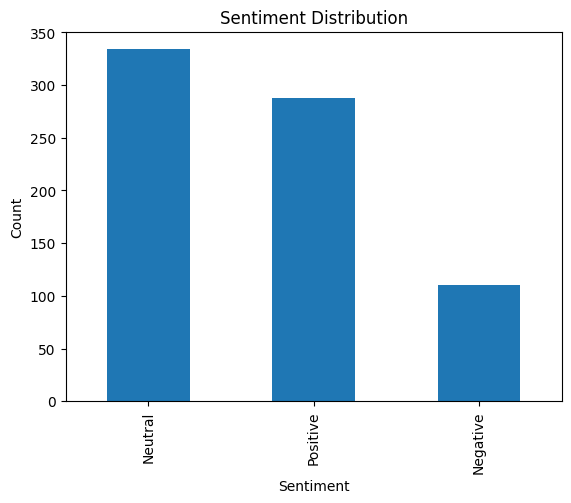

In [13]:
df['Sentiment'].value_counts().plot(kind='bar')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

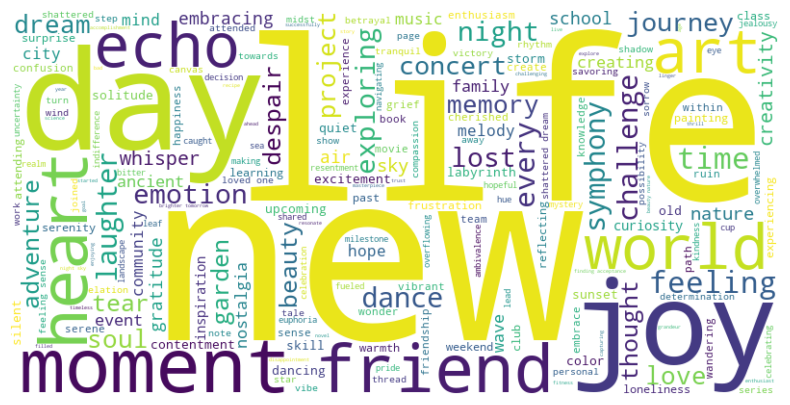

In [14]:
text_data = ' '.join(df['clean_text'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

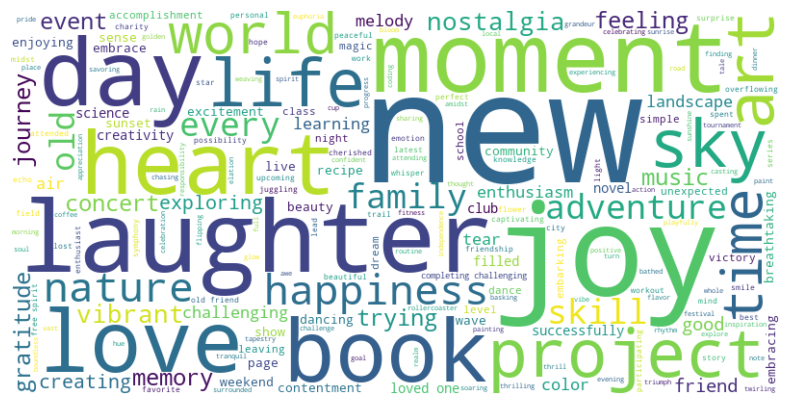

In [15]:
positive_text = ' '.join(df[df['Sentiment'] == 'Positive']['clean_text'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [16]:
df.to_csv("Sentiment_Analysis_Output.csv", index=False)

In [ ]:
#Natural Language Processing (NLP) – Sentiment Analysis
Step 1: Import Required Libraries

Load Python libraries such as Pandas, NLTK, Matplotlib, and WordCloud.

These libraries are used for data handling, text processing, and visualization.

Result:

Environment is ready for NLP and sentiment analysis.

Step 2: Load the Dataset

Social media sentiment dataset is loaded into the notebook.

Dataset contains text, sentiment labels, hashtags, platform, likes, and retweets.

Result:

Raw social media text data is successfully loaded into a DataFrame.

Step 3: Dataset Inspection

Dataset structure and data types are checked.

Missing values are verified in important columns.

Unnecessary index columns are identified.

Result:

Dataset structure is clearly understood and ready for cleaning.

Step 4: Data Cleaning

Unnecessary index columns are removed.

Dataset is filtered to keep only relevant columns.

Result:

Clean and structured dataset prepared for text processing.

Step 5: Text Preprocessing

Text is converted to lowercase.

Punctuation, numbers, emojis, and special symbols are removed.

Hashtags (#) and mentions (@) are cleaned.

Stopwords are removed.

Lemmatization is applied to normalize words.

Cleaned text is stored in a new column.

Result:

Noise-free and standardized text data created for analysis.

Step 6: Sentiment Analysis

Existing sentiment labels are used for classification.

Text data is categorized into Positive, Negative, and Neutral sentiments.

Result:

Each text entry is associated with a sentiment category.

Step 7: Sentiment Distribution Visualization

Bar chart is created to show sentiment counts.

Overall sentiment trend is analyzed.

Result:

Clear understanding of dominant sentiment in the dataset.

Step 8: Word Cloud Generation

Word cloud is generated using cleaned text.

Separate word cloud is created for positive sentiment texts.

Result:

Frequently used words and emotional patterns are visually identified.

Step 9: Engagement Analysis

Average likes and retweets are calculated for each sentiment.

Engagement levels are compared across sentiments.

Result:

Positive sentiment posts show higher user engagement.

Step 10: Platform-wise Sentiment Analysis

Sentiment distribution is analyzed across social media platforms.

Stacked bar chart is used for comparison.

Result:

Different platforms show different sentiment behavior.

Step 11: Final Analysis

Overall sentiment trends are reviewed.

Engagement and platform insights are summarized.

Result:

Meaningful insights extracted from social media text using NLP techniques.